In [69]:
import numpy as np
import matplotlib.pyplot as plt 
import healpy as hp

import yaml

from Qatmosphere_2d import Atmsophere

import scipy
import scipy.special as sci_spe
import time
from astropy.time import TimeDelta
 
import sys
import yaml

sys.path.append('/home/laclavere/qubic/qubic/Pipeline')

import qubic
from qubic.lib.Qscene import QubicScene

from pyoperators.iterative.core import AbnormalStopIteration
from pysimulators import (
    CartesianEquatorial2GalacticOperator,
    CartesianEquatorial2HorizontalOperator,
    CartesianHorizontal2EquatorialOperator,
    CartesianGalactic2EquatorialOperator,
    SamplingHorizontal,
    SphericalEquatorial2GalacticOperator,
    SphericalGalactic2EquatorialOperator,
    SphericalEquatorial2HorizontalOperator,
    SphericalHorizontal2EquatorialOperator)
from pysimulators.interfaces.healpy import Cartesian2HealpixOperator, Spherical2HealpixOperator
from pyoperators import *

%matplotlib inline

In [70]:
with open('/home/laclavere/Documents/Thesis/qubic/qubic/scripts/Atmosphere/params.yml', 'r') as file:
    params = yaml.safe_load(file)

In [71]:
atm = Atmsophere(params)

[28.88327169]
[[-0.00087894 -0.0009127  -0.0008602  ... -0.00049118 -0.00103533
  -0.00049806]
 [-0.0009578  -0.00062603 -0.00046497 ... -0.00062201 -0.00092676
  -0.00065052]
 [-0.0010585  -0.00067902 -0.00096796 ... -0.00099203 -0.00084882
  -0.00099057]
 ...
 [-0.00024012 -0.00121382 -0.00244332 ... -0.0004377  -0.00014024
  -0.00034984]
 [-0.00055026 -0.0012138  -0.00162028 ... -0.00101294 -0.00068913
  -0.00084154]
 [-0.00067586 -0.00088312 -0.00076027 ... -0.00083    -0.00081773
  -0.00061295]]


In [72]:
atm.mean_water_vapor_density

array([28.88327169])

In [73]:
rho = atm.mean_water_vapor_density
print(rho)

[28.88327169]


In [74]:
delta_rho = atm.generate_spatial_fluctuations_2d()
print((delta_rho))

[[0.00313281 0.00284858 0.0023871  ... 0.00163403 0.00222356 0.00280843]
 [0.00291015 0.00232256 0.00196851 ... 0.00147005 0.00188536 0.00242825]
 [0.00141287 0.00138729 0.00164592 ... 0.00054487 0.00053992 0.00105837]
 ...
 [0.00234972 0.00231213 0.00175497 ... 0.0016446  0.0021472  0.00226445]
 [0.00191603 0.00244643 0.0016977  ... 0.00176805 0.00189358 0.00234665]
 [0.00259193 0.00301713 0.00223846 ... 0.00149036 0.00223482 0.00263887]]


In [75]:
atm.get_water_vapor_density_2d_map()

[28.88327169]
[[-2.78941611e-04 -1.47653754e-05  2.18048166e-04 ...  2.76774365e-04
  -1.83838776e-04  5.40276527e-04]
 [-6.80153485e-04 -3.14095351e-05  1.47776061e-05 ...  1.48211893e-04
  -1.54462249e-05 -5.34686141e-04]
 [-9.93949124e-04 -3.72824940e-04 -1.14424221e-04 ...  1.18335909e-04
  -1.02941260e-04 -8.35111962e-04]
 ...
 [ 6.37223312e-04  9.94023247e-04  1.27080554e-03 ...  7.57668289e-04
   7.56428573e-04  7.53884815e-04]
 [ 3.31803071e-04  2.77799646e-04  1.07937014e-03 ...  4.83787090e-04
   4.06575557e-04  6.10456663e-04]
 [ 1.40051627e-04  3.27353248e-04  8.48694351e-04 ... -1.40868265e-04
  -5.01015810e-04  3.66865984e-04]]


array([[27.64782619, 28.92193385, 30.04478093, ..., 30.3280142 ,
        28.106502  , 31.59887084],
       [25.71280307, 28.84165997, 29.06441804, ..., 29.70796437,
        28.91865015, 26.41438418],
       [24.19938372, 27.19503198, 28.44128464, ..., 29.56387412,
        28.49666633, 24.96544674],
       ...,
       [32.06643993, 33.78726668, 35.12217267, ..., 32.64733953,
        32.64136044, 32.62909204],
       [30.59341467, 30.33295908, 34.1988901 , ..., 31.32642535,
        30.95403832, 31.93734584],
       [29.66860785, 30.57195341, 33.08635329, ..., 28.31374645,
        26.57677437, 30.7625212 ]])

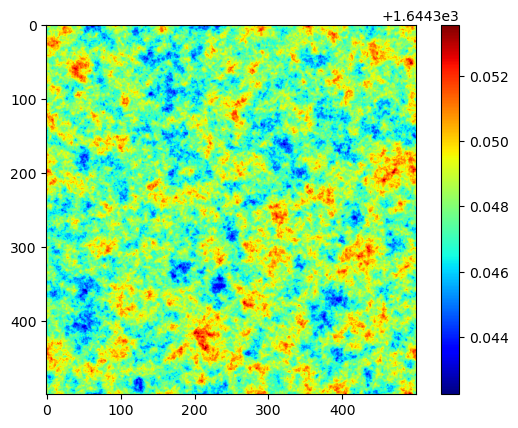

In [76]:
plt.imshow(atm.get_mean_water_vapor_density(atm.params['altitude_atm_2d'] + atm.generate_spatial_fluctuations_2d()), cmap='jet')
plt.colorbar()

[28.88327169]
[[-7.73137609e-04 -6.24862335e-04  3.79265984e-05 ... -1.33138282e-03
  -7.79237029e-04 -3.32133081e-04]
 [-7.02798730e-04 -4.49334331e-04  1.06807826e-04 ... -1.11835032e-03
  -4.64439838e-04 -7.13637570e-04]
 [-6.03872395e-04 -1.87293067e-04  2.56182551e-04 ... -8.52920726e-04
  -8.21314838e-04 -3.76170160e-04]
 ...
 [ 1.02766167e-03  1.60537540e-03  1.36551030e-03 ... -5.59130160e-04
  -3.36373004e-04  3.57171224e-04]
 [ 2.44243670e-04  9.76884956e-04  3.75943325e-04 ... -9.08299599e-04
  -5.83627132e-04 -5.02103667e-04]
 [ 6.77495445e-05  1.86864957e-04  2.85659345e-04 ... -9.96781614e-04
  -6.92047218e-04 -3.62796964e-04]]


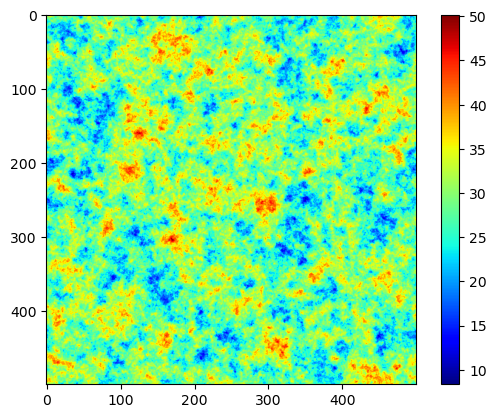

In [77]:
plt.imshow(atm.get_water_vapor_density_2d_map(), cmap='jet')
plt.colorbar()

In [78]:
map_temp = atm.get_maps()
frequencies = atm.integrated_absorption_spectrum()[1]

[28.88327169]
[[ 5.55329937e-04  3.23433489e-04 -4.08412208e-04 ...  9.83496312e-04
   9.78392516e-04  1.06317796e-03]
 [-2.61275185e-04 -2.45809880e-04 -5.41440564e-04 ...  6.19139449e-04
   2.97314064e-04  3.80114839e-04]
 [-1.27897127e-04 -6.47994331e-04 -6.50928595e-04 ...  4.03732912e-05
  -3.46797374e-04 -2.63617747e-04]
 ...
 [-1.05741471e-04  1.80974388e-04 -1.89338094e-04 ... -3.46670661e-04
  -6.11142490e-04 -5.39061431e-04]
 [ 6.73269755e-04  3.25414034e-04 -4.04409164e-04 ...  5.65872989e-04
   5.22186964e-04  1.32605294e-04]
 [ 7.75313880e-04  2.31998427e-04 -5.01502342e-04 ...  9.88213289e-04
   4.30402930e-04  3.47942587e-04]]


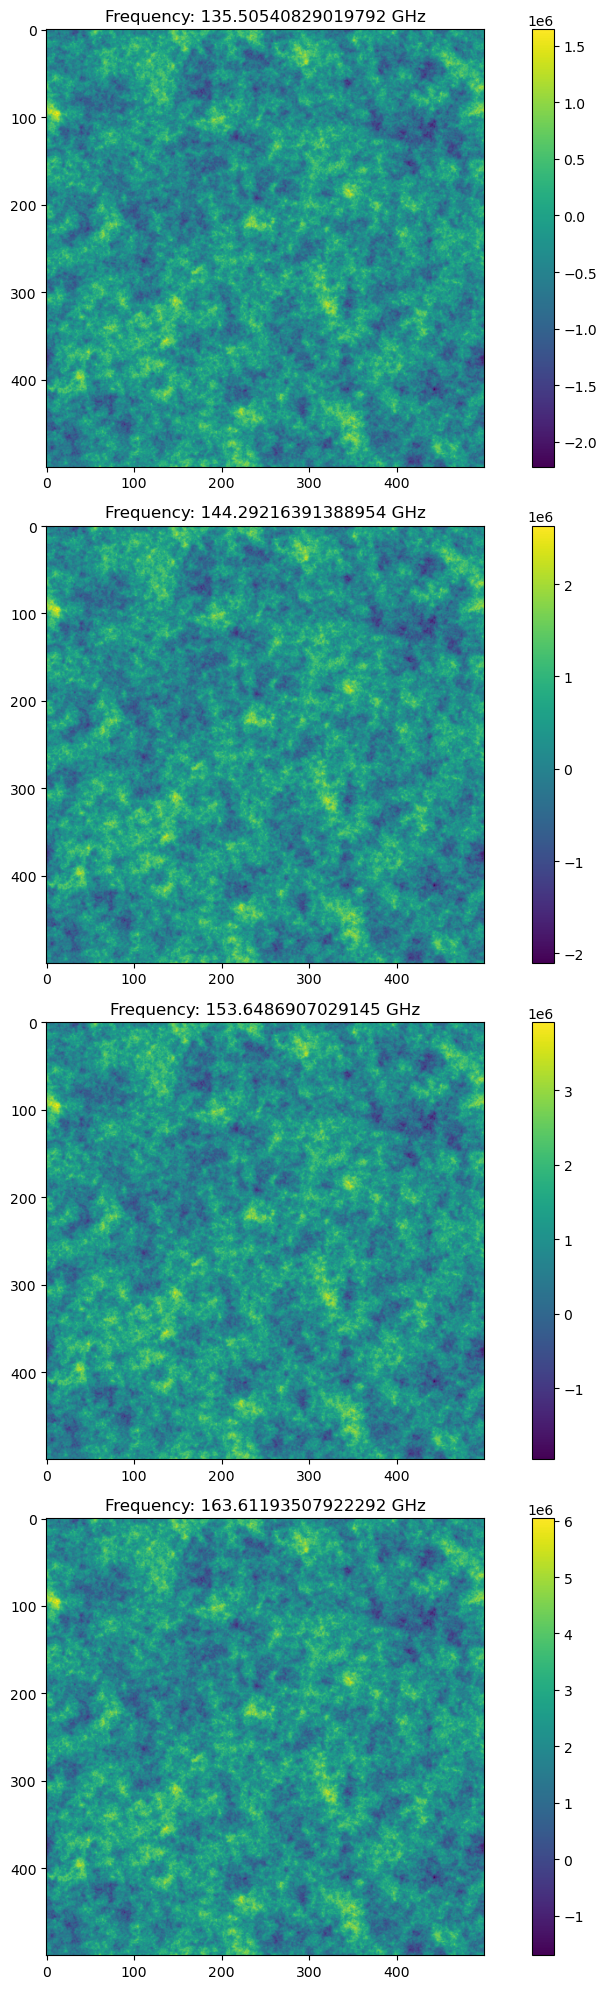

In [79]:
fig, axs = plt.subplots(len(frequencies), 1, figsize=(10, 5*len(frequencies)))
for i in range(len(frequencies)):
    im = axs[i].imshow(map_temp[i])
    plt.colorbar(im, ax=axs[i])
    axs[i].set_title(f'Frequency: {frequencies[i]} GHz')
plt.tight_layout()
plt.show()

In [80]:
healpy_atm_maps = atm.get_healpy_atm_maps_2d()

[28.88327169]
[[-0.00145341 -0.00144012 -0.00136976 ... -0.0019842  -0.00219105
  -0.00194996]
 [-0.0015345  -0.00162555 -0.00198663 ... -0.00248466 -0.00174019
  -0.00153029]
 [-0.00117739 -0.00133485 -0.00168456 ... -0.00226348 -0.00166564
  -0.00165165]
 ...
 [-0.00191386 -0.00199978 -0.00213653 ... -0.00152985 -0.0015177
  -0.00168026]
 [-0.00243404 -0.00202437 -0.00184852 ... -0.0016847  -0.00168609
  -0.00210462]
 [-0.00217329 -0.00175444 -0.00105762 ... -0.00171267 -0.00205404
  -0.00236042]]
[28.88327169]
[[-4.58124025e-04 -8.22386309e-04 -7.20633714e-04 ... -1.00307359e-03
  -1.01512174e-03 -8.61946558e-04]
 [-4.09600535e-04 -3.21519757e-04 -7.54829490e-04 ... -8.09946854e-04
  -1.05492176e-03 -4.26235948e-04]
 [-6.46324592e-04 -5.30493392e-04 -5.91668432e-04 ... -8.79338397e-04
  -1.06023081e-03 -8.28467190e-04]
 ...
 [ 4.14278413e-04  9.05838135e-05  2.11303957e-04 ... -4.37124740e-04
   5.91367822e-04  8.22465090e-04]
 [-9.06876864e-04 -8.40477705e-05 -3.26358557e-04 ... -4

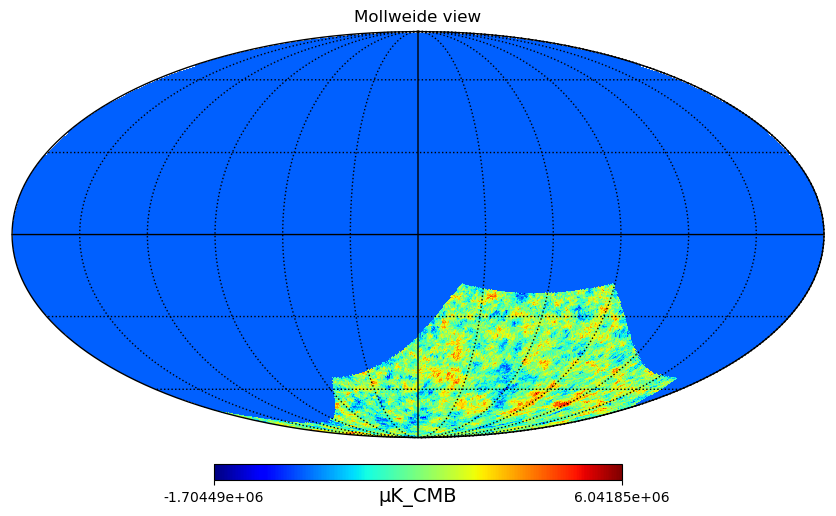

In [81]:
hp.mollview(healpy_atm_maps[-1] ,min=np.min(map_temp[-1]), cmap='jet', unit='µK_CMB')
hp.graticule()

In [82]:
from qubic.scripts.MapMaking.src.FMM.model.planck_timeline import InputMaps
from pyoperators import *
comm = MPI.COMM_WORLD
rank = comm.Get_rank()

In [83]:
cmb_maps = InputMaps({'cmb':42}, atm.frequencies, 2, params['nside']).m_nu

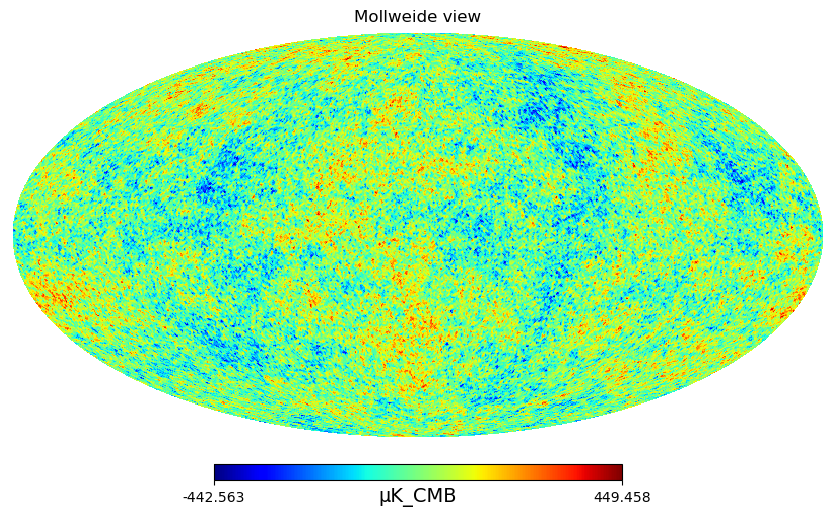

In [84]:
hp.mollview(cmb_maps[-1, :, 0],cmap='jet', unit='µK_CMB')

In [85]:
input_maps = cmb_maps.copy()
input_maps[:, :, 0] += healpy_atm_maps

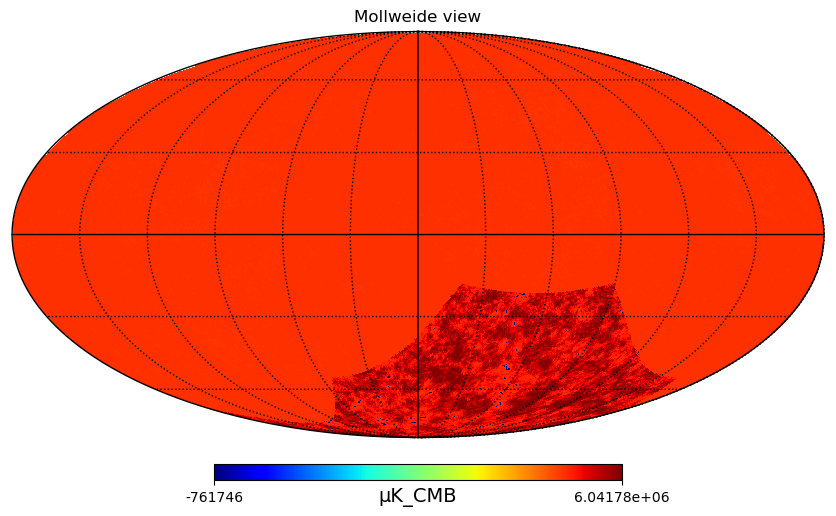

In [86]:
hp.mollview(input_maps[-1, :, 0] ,cmap='jet', unit='µK_CMB', norm='hist')
hp.graticule()


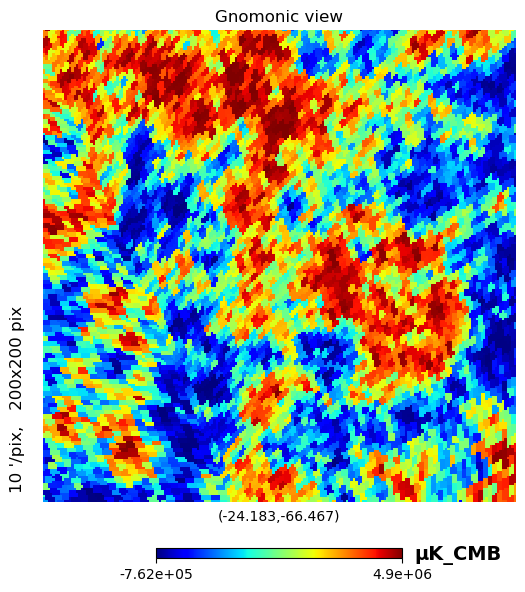

In [87]:
hp.gnomview(input_maps[-1, :, 0], cmap="jet", unit="µK_CMB", norm="hist", reso=10, rot=np.array([atm.qubic_dict['latitude'],atm.qubic_dict['longitude']])) 

In [88]:
qubic_sampling = qubic.lib.Qsamplings.QubicSampling(params['npointings'], date_obs=atm.qubic_dict['date_obs'], period=1, latitude=atm.qubic_dict['latitude'], longitude=atm.qubic_dict['longitude'])

In [89]:
r = np.random.RandomState(2)

cosdtheta = np.cos(np.radians(20))
theta = np.degrees(np.arccos(cosdtheta + (1 - cosdtheta) * r.rand(params['npointings'])))
phi = r.rand(params['npointings']) * 360
pitch = r.rand(params['npointings']) * 360

In [90]:
center = np.array([0, -57])

In [91]:
c2s = Cartesian2SphericalOperator('azimuth,elevation')
rot = Rotation3dOperator("ZY'", - atm.qubic_dict['latitude'], atm.qubic_dict['longitude'])
s2c = Spherical2CartesianOperator('zenith, azimuth', degrees=True)
rotation = c2s((rot(s2c)))
coords = rotation(np.asarray([theta, phi]).T)
azimuth_qubic = coords[..., 0]
elevation_qubic = coords[..., 1]

In [92]:
hp_test = np.zeros(hp.nside2npix(params['nside']))
az, el = [], []
rotation_azel2hp = Spherical2HealpixOperator(params['nside'], 'azimuth,elevation')
for az_ in azimuth_qubic:
    for el_ in elevation_qubic:
        az.append(az_)
        el.append(el_)
hp_test_index = rotation_azel2hp(np.asarray([azimuth_qubic, elevation_qubic]).T).astype(int)
hp_test[hp_test_index] = 1

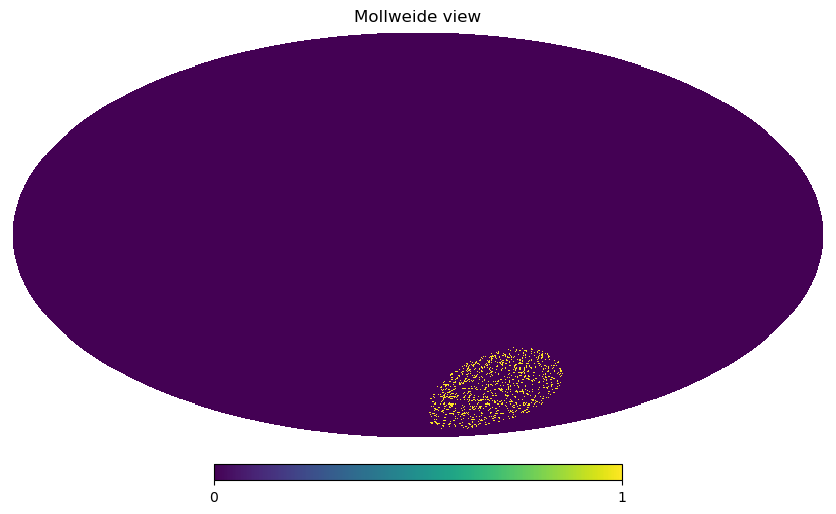

In [93]:
hp.mollview(hp_test)

In [94]:
atm.qubic_dict['longitude']

-66.46666666666667

# Map-making

In [95]:
Qacq = qubic.lib.InstrumentModel.Qacquisition.QubicDualBand(atm.qubic_dict, nsub=params['nsub_in'], nrec=params['nrec'])
H = Qacq.get_operator(fwhm=Qacq.allfwhm)
invN = Qacq.get_invntt_operator()

You asked 1000 pointings with repeat strategy so I will provide 333 pointings repeated 3 times.
Info apcnb2325: Allocating (991008,9) elements = 136.09423828125 MiB in FSRRotation3dMatrix.__init__.
Info apcnb2325: Allocating (991008,9) elements = 136.09423828125 MiB in FSRRotation3dMatrix.__init__.
Info apcnb2325: Allocating (991008,9) elements = 136.09423828125 MiB in FSRRotation3dMatrix.__init__.
Info apcnb2325: Allocating (991008,9) elements = 136.09423828125 MiB in FSRRotation3dMatrix.__init__.


In [96]:
atm.qubic_dict['DEC_center']

-57

In [97]:
#coverage = joint.qubic.subacqs[0].get_coverage()
coverage = Qacq.coverage
npix_qubic=0
for i in coverage:
    if i!=0:
        npix_qubic+=1
covnorm = coverage / coverage.max()
seenpix = covnorm > 0.1
fsky = seenpix.astype(float).sum() / seenpix.size
coverage_cut = coverage.copy()
coverage_cut[~seenpix] = 1

mask = np.ones(12*params['nside']**2)
mask[seenpix] = 0

In [111]:
A = H.T * invN * H
b = H.T * invN * H(input_maps)
x0 = input_maps #+ 1e3 * np.random.randn(input_maps.shape[0], input_maps.shape[1], input_maps.shape[2])  

In [112]:
import time
from qubic.lib.Qcg import PCGAlgorithm
time0 = time.time()
algo = PCGAlgorithm(
    A,
    b,
    comm,
    x0=x0,
    tol=1e-18,
    maxiter=50,
    disp=True,
    M=None,
    center=center,
    reso=15,
    seenpix=seenpix,
    input=input_maps,
)
try:
    output = algo.run()
    success = True
    message = 'Success'
except AbnormalStopIteration as e:
    output = algo.finalize()
    success = False
    message = str(e)

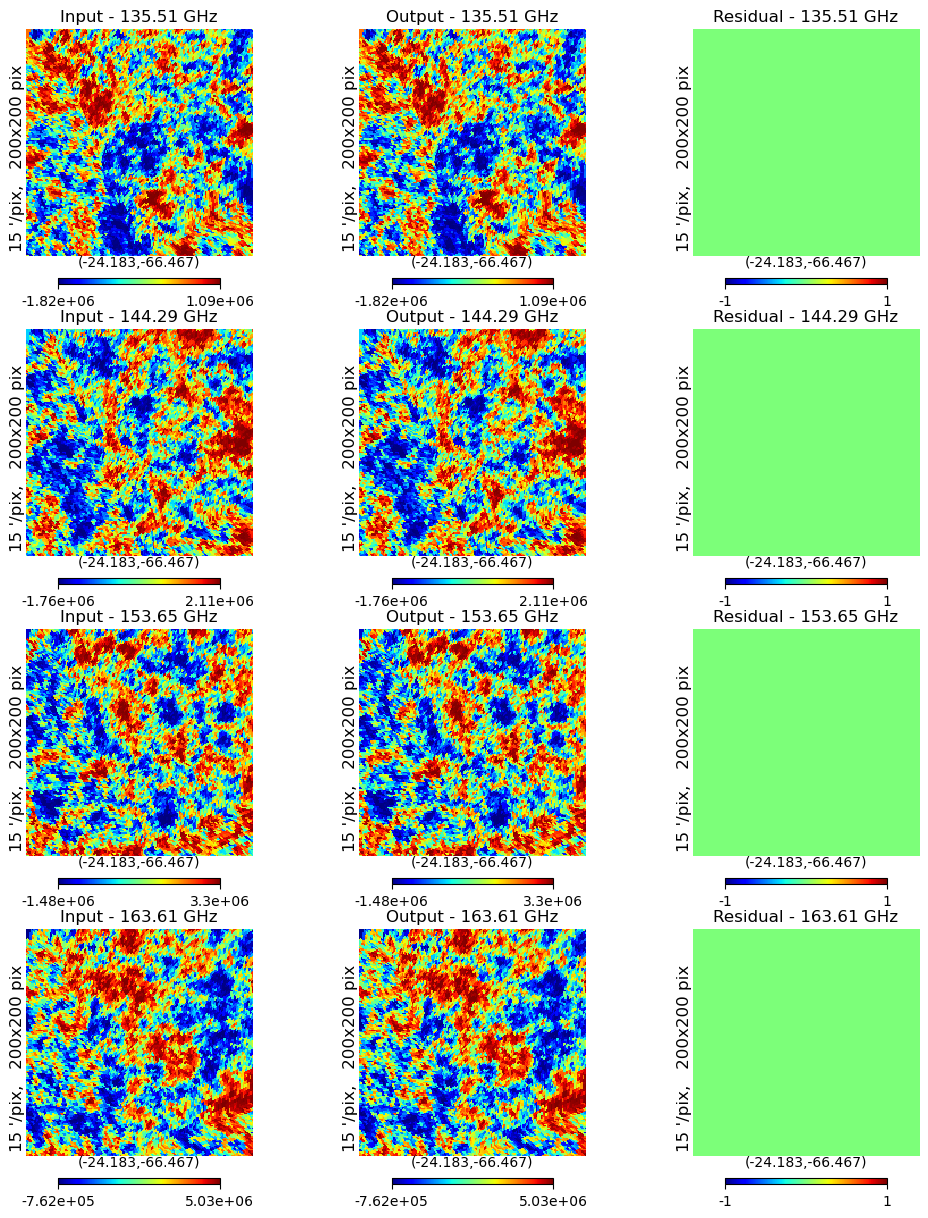

In [113]:
plt.figure(figsize=(10, 12))
k=1
for inu in range(output['x'].shape[0]):
    hp.gnomview(input_maps[inu, :, 0], norm='hist', cmap='jet', rot=(atm.qubic_dict['latitude'], atm.qubic_dict['longitude']),title='Input - {:.2f} GHz'.format(atm.frequencies[inu]), reso=15, sub=(output['x'].shape[0], 3, k))
    hp.gnomview(output['x'][inu, :, 0], norm='hist', cmap='jet', rot=(atm.qubic_dict['latitude'], atm.qubic_dict['longitude']),title='Output - {:.2f} GHz'.format(atm.frequencies[inu]), reso=15, sub=(output['x'].shape[0], 3, k+1))
    hp.gnomview(output['x'][inu, :, 0] - input_maps[inu, :, 0], norm='hist', cmap='jet', rot=(atm.qubic_dict['latitude'], atm.qubic_dict['longitude']),title='Residual - {:.2f} GHz'.format(atm.frequencies[inu]), reso=15, sub=(output['x'].shape[0], 3, k+2))
    k+=3

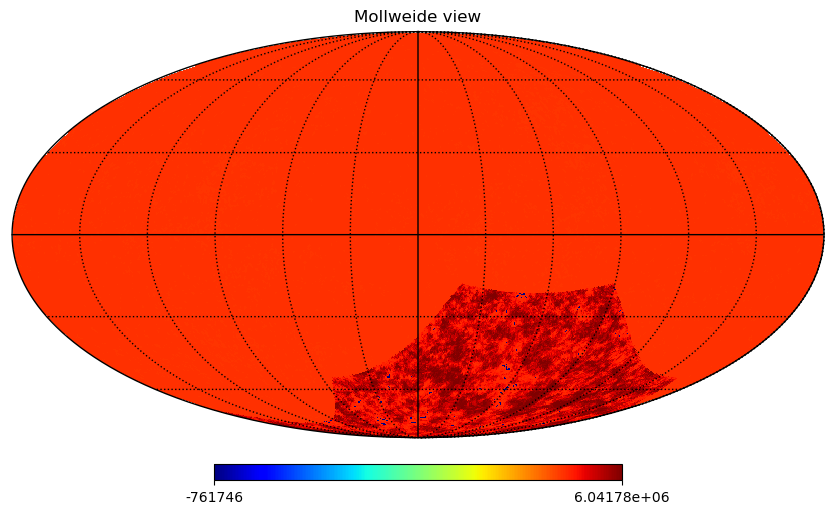

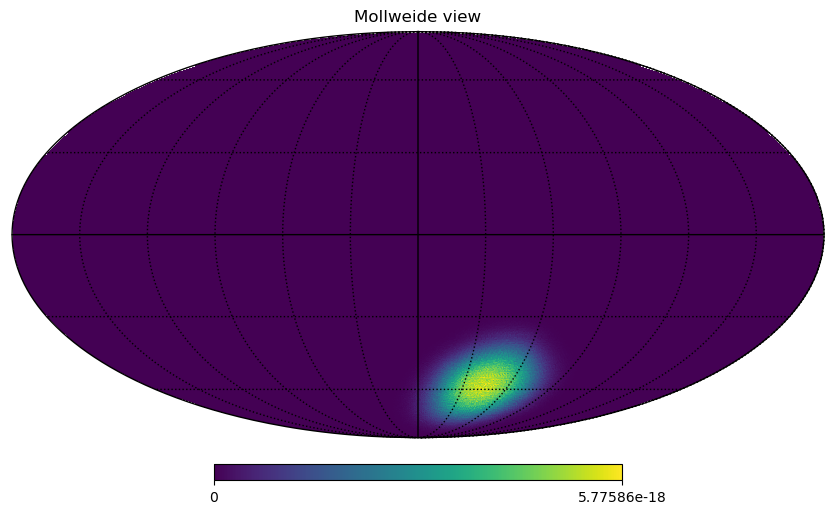

In [114]:
hp.mollview(output['x'][-1, :, 0], cmap='jet', norm='hist')
hp.graticule()
hp.mollview(coverage)
hp.graticule()

In [102]:
stop

NameError: name 'stop' is not defined

In [13]:
from lib.InstrumentModel.Qacquisition import QubicMultiAcquisitions

ModuleNotFoundError: No module named 'lib'

In [10]:
def get_dict(params, comm, key='in'):
    """QUBIC dictionary.

    Method to modify the qubic dictionary.

    Parameters
    ----------
    key : str, optional
        Can be "in" or "out".
        It is used to build respectively the instances to generate the TODs or to reconstruct the sky maps,
        by default "in".

    Returns
    -------
    dict_qubic: dict
        Modified QUBIC dictionary.

    """

    args = {
        "npointings": params["QUBIC"]["npointings"],
        "nf_recon": params["QUBIC"]["nrec"],
        "nf_sub": params["QUBIC"][f"nsub_{key}"],
        "nside": params["SKY"]["nside"],
        "MultiBand": True,
        "period": 1,
        "RA_center": params["SKY"]["RA_center"],
        "DEC_center": params["SKY"]["DEC_center"],
        "filter_nu": 150 * 1e9,
        "noiseless": False,
        "comm": comm,
        "dtheta": params["QUBIC"]["dtheta"],
        "nprocs_sampling": 1,
        "nprocs_instrument": comm.Get_size(),
        "photon_noise": True,
        "nhwp_angles": 3,
        #'effective_duration':3,
        "effective_duration150": 3,
        "effective_duration220": 3,
        "filter_relative_bandwidth": 0.25,
        "type_instrument": "two",
        "TemperatureAtmosphere150": None,
        "TemperatureAtmosphere220": None,
        "EmissivityAtmosphere150": None,
        "EmissivityAtmosphere220": None,
        "detector_nep": float(params["QUBIC"]["NOISE"]["detector_nep"]),
        "synthbeam_kmax": params["QUBIC"]["SYNTHBEAM"]["synthbeam_kmax"],
    }

    ### Get the default dictionary
    dictfilename = "dicts/pipeline_demo.dict"
    dict_qubic = qubic.lib.Qdictionary.qubicDict()
    dict_qubic.read_from_file(dictfilename)

    for i in args.keys():

        dict_qubic[str(i)] = args[i]

    return dict_qubic